In [1]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd


# Data Envelopment Analysis

- @CHARNES1978MeasuringEfficiencyDecision
- @RAMANATHAN2010IntroductionDataEnvelopment


In [39]:
dt = pd.DataFrame({
   "center": ["Sofia", "Varna", "Plovdiv", "Haskovo", "Tarnovo", "Burgas"],
   "employees": [15, 20, 25, 42, 50, 60],
   "managers": [2, 2, 3, 1, 5, 2],
   "calls_all": [1000, 2000, 500, 400, 1500, 600],
   "calls_support": [300, 100, 300, 400, 500, 60],
}).set_index("center")

dt["calls_sales"] = dt["calls_all"] - dt["calls_support"]
dt

,employees,managers,calls_all,calls_support,calls_sales
center,,,,,
Sofia,15,2,1000,300,700
Varna,20,2,2000,100,1900
Plovdiv,25,3,500,300,200
Haskovo,42,1,400,400,0
Tarnovo,50,5,1500,500,1000
Burgas,60,2,600,60,540


In [40]:
dt["calls_per_empl"] = (dt["calls_all"] / dt["employees"])
dt["calls_per_empl_norm"] = 100 * dt["calls_per_empl"] / dt["calls_per_empl"].max()
dt["calls_per_empl_norm"].sort_values(ascending=False)

dt["calls_sales_per_empl"] = (dt["calls_sales"] / dt["employees"])
dt["calls_sales_per_empl_norm"] = 100 * dt["calls_sales_per_empl"] / dt["calls_sales_per_empl"].max()

dt["calls_support_per_empl"] = (dt["calls_support"] / dt["employees"])
dt["calls_support_per_empl_norm"] = 100 * dt["calls_support_per_empl"] / dt["calls_support_per_empl"].max()

dt[["calls_per_empl_norm", "calls_sales_per_empl_norm", "calls_support_per_empl_norm"]]

,calls_per_empl_norm,calls_sales_per_empl_norm,calls_support_per_empl_norm
center,,,
Sofia,66.666667,49.122807,100.000000
Varna,100.000000,100.000000,25.000000
Plovdiv,20.000000,8.421053,60.000000
Haskovo,9.523810,0.000000,47.619048
Tarnovo,30.000000,21.052632,50.000000
Burgas,10.000000,9.473684,5.000000


In [41]:
dt["calls_sales_per_empl"].values
np.zeros(len(dt))
np.stack([dt["calls_sales_per_empl"].values, np.zeros(len(dt))], axis=1)


array([[46.66666667,  0.        ],
       [95.        ,  0.        ],
       [ 8.        ,  0.        ],
       [ 0.        ,  0.        ],
       [20.        ,  0.        ],
       [ 9.        ,  0.        ]])

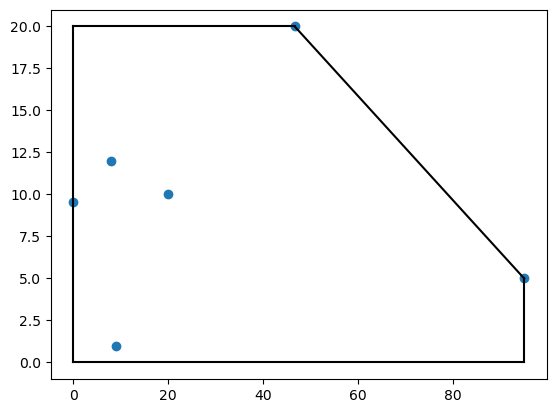

In [42]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import numpy as np

rng = np.random.default_rng()

points = dt[["calls_sales_per_empl", "calls_support_per_empl"]].values  # 30 random points in 2-D
points1 = np.stack([dt["calls_sales_per_empl"].values, np.zeros(len(dt))], axis=1)
points2 = np.stack([np.zeros(len(dt)), dt["calls_support_per_empl"].values], axis=1)
points_all = np.concatenate([points, points1, points2, np.array([0, 0]).reshape(1, -1)], axis=0)

hull = ConvexHull(points_all)

import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')

for simplex in hull.simplices:
    plt.plot(points_all[simplex, 0], points_all[simplex, 1], 'k-')
